# What's your (Pokemon) type?
__Pokemon Data Exploration
<br>Jessica Ngo__

## Data

This dataset includes 721 Pokemon, including their number, name, primary and secondary type, and base stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. 

These base stats are the raw attributes that define the average strength of a given Pokemon. Note that this dataset is about the Pokemon games (not pokemon cards or Pokemon Go).

The data has been acquired from several different sites, including pokemon.com, pokemondb.net, and bulbapedia.com.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [2]:
#import dataframe
df = pd.read_csv("data/Pokemon.csv")

In [3]:
#view column names
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

The base stats as described by Myles O'Neill, from Kaggle, is:
<br>
>#: ID for each pokemon
<br>Name: Name of each Pokemon
<br>Type 1: Each Pokemon has a type that determines weakness/resistance to attacks
<br>Type 2: Some pokemon are dual type and therefore have a second type
<br>Total: sum of all stats that come after this, a general indicator of how strong a Pokemon is
<br>HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
<br>Attack: the base modifier for normal attacks (eg. Scratch, Punch)
<br>Defense: the base damage resistance against normal attacks
<br>SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
<br>SP Def: the base damage resistance against special attacks
<br>Speed: determines which pokemon attacks first each round

In [4]:
#view first 5 lines
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Challenges to this dataset involve duplicate numbers under '#' (e.g. # 3 Venusaur and VenusaurMegaVenusaur). These duplicates correspond to Mega Evolutions, or different versions of the same Pokemon. In addition, not every Pokemon will have a dual type (primary and secondary types, e.g. # 4 Charmander). For our purposes, we will only be focusing on looking at Type 1.

## Analytic Questions

<div class="alert alert-block alert-info"><b>Imagine that you're a trainer on your very first Pokemon adventure, before you start and select your starter Pokemon... wait a minute... there are different types? Just how many Pokemon are there out there?! What Pokemon are you going to choose? This brings us to first analytic question...</b>

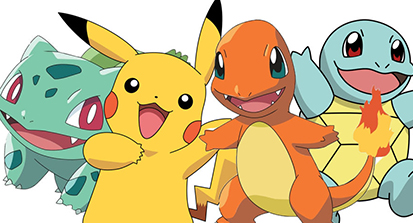

In [5]:
from IPython.display import Image
Image(filename='data/starterpkmn.jpg') 

[Image Source](https://dailygigl.com/which-starter-pokemon-are-you/)

### 1) How many Pokemon are in each Pokemon type? How many Pokemon are in each Generation?

In [6]:
#count of Pokemon by Name
len(df['Name'])

800

There are 800 Pokemon total, including Mega Evolutions. How many are there if we exclude these Mega Evolutions?

In [7]:
#unique counts of Pokemon by #
df['#'].nunique()

721

There are 721 Pokemon total if you exclude the Mega Evolutions.

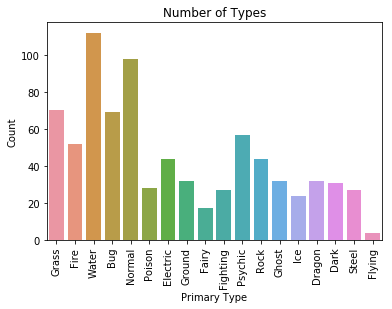

In [8]:
#bar chart of Pokemon by Type 1
sns.countplot(x='Type 1', data=df)
plt.xticks(rotation = 90)
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Number of Types')
plt.show()

There seem to be a lot of Water types, but only a little of Flying. Does this differ by generation?

In [9]:
#pivot table of Type 1 counts by Generation
print('Primary Types across Generation (#)')
pivot_df = pd.pivot_table(df[['Type 1', 'Generation']], index='Generation', columns='Type 1', margins=True, aggfunc=len, fill_value = 0)
pivot_df

Primary Types across Generation (#)


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,All
Generation,,,,,,,,,,,,,,,,,,,
1,14,0,3,9,2,7,14,0,4,13,8,2,24,14,11,10,0,31,166
2,12,6,0,7,5,2,8,0,1,9,3,4,15,1,7,5,3,18,106
3,12,6,12,5,0,5,8,0,5,13,7,7,18,3,12,8,12,27,160
4,10,3,4,12,1,3,5,0,7,15,4,3,18,6,8,6,3,13,121
5,18,13,9,8,0,7,9,2,5,15,10,6,19,2,14,6,4,18,165
6,3,3,4,3,9,3,8,2,10,5,0,2,4,2,5,9,5,5,82
All,69,31,32,44,17,27,52,4,32,70,32,24,98,28,57,44,27,112,800


The table above provides the specific counts of all Pokemon types across generation. It's obvious here that there is a large number of Water types compared to Flying types. Though this table provides the counts of types across generation, it may be more informative to look at the percentages as every Generation has a different number of Pokemon.

In [10]:
#pivot table of % of Type 1 Pokemon across Generations
print('Primary Types across Generations (%)')
pivot_df.div(pivot_df.iloc[:,-1], axis=0).applymap(lambda x: "{0:.0f}%".format(100*x))

Primary Types across Generations (%)


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,All
Generation,,,,,,,,,,,,,,,,,,,
1,8%,0%,2%,5%,1%,4%,8%,0%,2%,8%,5%,1%,14%,8%,7%,6%,0%,19%,100%
2,11%,6%,0%,7%,5%,2%,8%,0%,1%,8%,3%,4%,14%,1%,7%,5%,3%,17%,100%
3,8%,4%,8%,3%,0%,3%,5%,0%,3%,8%,4%,4%,11%,2%,8%,5%,8%,17%,100%
4,8%,2%,3%,10%,1%,2%,4%,0%,6%,12%,3%,2%,15%,5%,7%,5%,2%,11%,100%
5,11%,8%,5%,5%,0%,4%,5%,1%,3%,9%,6%,4%,12%,1%,8%,4%,2%,11%,100%
6,4%,4%,5%,4%,11%,4%,10%,2%,12%,6%,0%,2%,5%,2%,6%,11%,6%,6%,100%
All,9%,4%,4%,6%,2%,3%,6%,0%,4%,9%,4%,3%,12%,4%,7%,6%,3%,14%,100%


In [11]:
#stacked bar chart of Type 1 by Generation
#pivot_df.plot(kind='bar', stacked=True)
#Messy chart - did not use

With the exception of the 6th generation, Water and Normal types account for more than 10% of types across generations. However, Flying types are at 0% up until the 4th generation. Even then, Flying types only represent 1% or 2% of types for the 5th and 6th generation respectively. 

_Note that we only examined Type 1. It is possible that Flying tends to be more of a secondary type, which would be interesting to investigate further._

<div class="alert alert-block alert-info"><b>Now that we know just how many Pokemon there are of each type, I'm guessing you probably want to make a team of the strongest Pokemon! Will you be making a team of your favorite type?</b>

### 2) How powerful are these Pokemon? Are there differences by type?

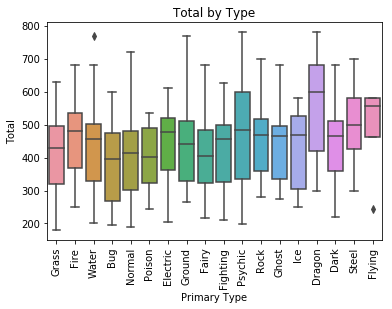

In [12]:
#interquartile range of Total by Type 1
#df.boxplot(column = 'Total', by = 'Type 1' )
#plt.xticks(rotation=90)
#plt.xlabel('Type 1')
#plt.ylabel('Total')
sns.boxplot(x='Type 1', y='Total', data=df)
plt.xticks(rotation=90)
plt.xlabel('Primary Type')
plt.ylabel('Total')
plt.title('Total by Type')
plt.show()

There seems to be one really strong Water type and one really weak Flying type. However, there seem to be a lot of strong Dragon, Psychic, and Ground types. 

<div class="alert alert-block alert-info"><b>Why are these specific Pokemon types so darn strong? Maybe there are a lot of Legendary Pokemon for these types. Oh wait, I didn't tell you there were Legendary Pokemon?</b>

### 3) How many Legendary Pokemon are there in relation to all Pokemon? Just how powerful are these Legendary Pokemon?

In [13]:
#boolean count for Legendary
df['Legendary'].value_counts(sort=True)

False    735
True      65
Name: Legendary, dtype: int64

Only 65 (9%) of all Pokemon are Legendary. Which generation has more Legendary Pokemon?

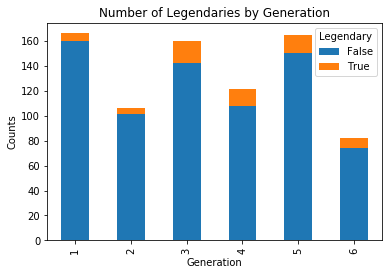

In [16]:
#Stacked Bar Chart of Legendary by Generation
pivot_df2 = pd.pivot_table(df[['Legendary', 'Generation']], index='Generation', columns='Legendary', aggfunc=len, fill_value = 0)
pivot_df2.plot(kind='bar', stacked=True)
plt.xlabel('Generation')
plt.ylabel('Counts')
plt.title('Number of Legendaries by Generation')
plt.show()

There seem to be more Legendaries in the 3rd and 5th generations. Are Legendary Pokemon more powerful than those that aren't?

In [17]:
#quanitative summary of Legendary
df[['Legendary', 'Total']].groupby('Legendary').describe().transpose()

Legendary         False       True 
Total count  735.000000   65.000000
      mean   417.213605  637.384615
      std    106.760417   60.937389
      min    180.000000  580.000000
      25%    324.000000  580.000000
      50%    425.000000  600.000000
      75%    498.000000  680.000000
      max    700.000000  780.000000

It looks like there's a huge difference between averages and minimum and maximum strengths between Pokemon that are legendary and those that aren't. Is strength correlated with whether a Pokemon is legendary?

In [18]:
#correlation between Legendary and Total
df['Legendary'].corr(df['Total']) #correlation is designed more for two continuous variables

0.5017583833882712

There seems to be a moderate correlation between Legendary Pokemon and total strength; however, are the differences statistically significant.

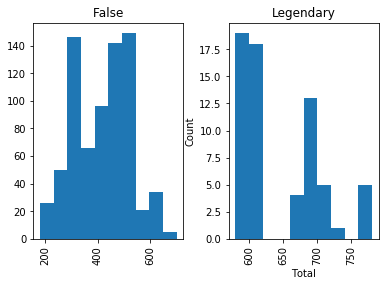

In [19]:
#histogram of Total by Legendary
df['Total'].hist(by=df['Legendary'])
plt.xlabel('Total')
plt.ylabel('Count')
plt.title('Legendary')
plt.show()

The distributions are not normal; therefore, we need to use a Mann-Whitney U-Test. 

In [20]:
stats.mannwhitneyu(df['Total'], df['Legendary'])

MannwhitneyuResult(statistic=0.0, pvalue=4.3534546986122525e-291)

The test shows that there is a statistically significant difference in total strength between legendary and non-legendary Pokemon!

Like I mentioned earlier, I only looked at Type 1 and did not consider Type 2 or both together. In addition, I would look beyond just 'Total' and look to see if there are correlations and differences in the other base stats based on 'Type', 'Legendary', and 'Generation.'

<div class="alert alert-block alert-info"><b>I know you're a brand new Pokemon trainer and all, but I hope you learned a ton to be confident enough to build your own team and become the best trainer you can be! <br><br>There are a ton of Water Pokemon, but if you want really strong Pokemon go for Dragon, Psychic, or Ground types - maybe even a Legendary Pokemon! Those are totally strong!
<br><br>Good luck trainer!</b>